# XGBoost算法效果测试 

In [6]:
from __future__ import print_function, division
import jupyterthemes.jtplot as jtplot
jtplot.style()
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
from xgboost import XGBRegressor


In [12]:
data = pd.read_csv('E:/Jupyter/Lib/DataSettings/melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

# Separate data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)
xgb_y_pred = my_model.predict(X_valid)

print(" XGBoost绝对平均得分：", str(round(mean_absolute_error(y_valid,xgb_y_pred),2)))
print("XGBoost平方平均得分",str(round(mean_squared_error(y_valid,xgb_y_pred),2)))
print("XGBoost解释方差分：",str(round(explained_variance_score(y_valid,xgb_y_pred),2)))
print('XGBoost R2得分：',round(r2_score(y_valid,xgb_y_pred),2))

 XGBoost绝对平均得分： 232655.07
XGBoost平方平均得分 127073028416.0
XGBoost解释方差分： 0.66
XGBoost R2得分： 0.66


# 时间序列分析

In [1]:
from sklearn.preprocessing import scale,MinMaxScaler

from hmmlearn.hmm import GaussianHMM
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tushare as ts
from sklearn.preprocessing import scale
%matplotlib inline

隐藏状态一览： [3 3 3 ... 0 0 0]


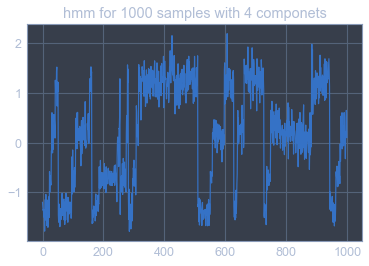

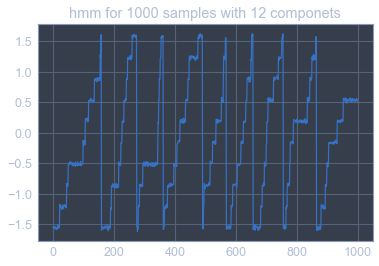

In [14]:
# 数据预处理
data = np.loadtxt('E:/Jupyter/Lib/DataSettings/Chapter08/data_hmm.txt',delimiter=',')
X = np.column_stack([data[:,2]])
X = scale(X)
# 生成模型
num_componets = 4
hmm_model = GaussianHMM(n_components=num_componets,n_iter=1000)
hmm_model.fit(X)
hidden_state = hmm_model.predict(X)
print('隐藏状态一览：',hidden_state)
num_sample = 1000
samples,_ = hmm_model.sample(num_sample)
plt.figure()
plt.plot(np.arange(num_sample),samples[:,0])
plt.title('hmm for 1000 samples with 4 componets')
plt.show()

# 12 componets
num_componets = 12
hmm_model = GaussianHMM(n_components=num_componets,n_iter=1000)
hmm_model.fit(X)
hidden_state = hmm_model.predict(X)
num_sample = 1000
samples,_ = hmm_model.sample(num_sample)
plt.figure()
plt.plot(np.arange(num_sample),samples[:,0])
plt.title('hmm for 1000 samples with 12 componets')
plt.show()

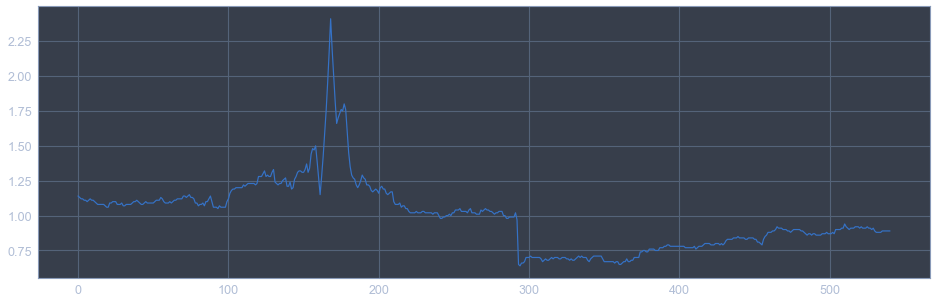

预测隐藏状态中-------------------------------------------
--------------------------------涨幅预测图----------------------------------


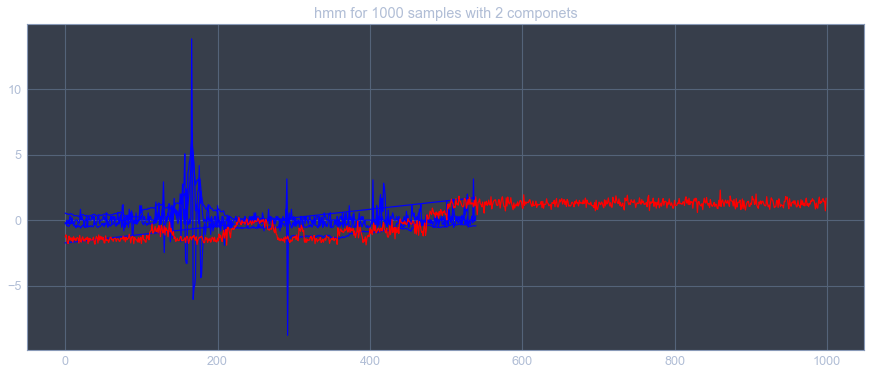

—————————————————成交量预测图————————————————


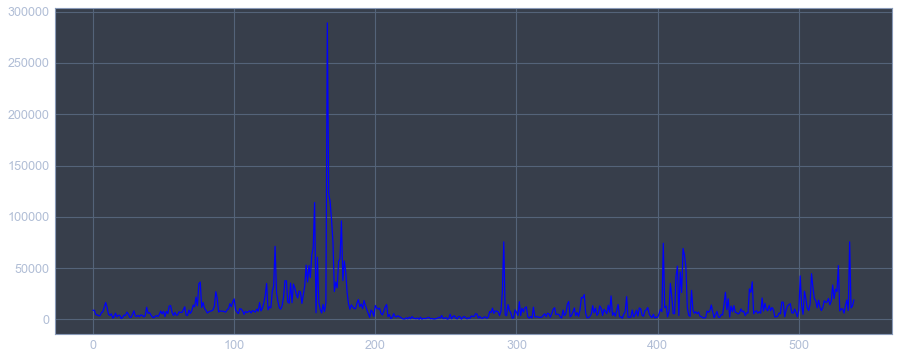

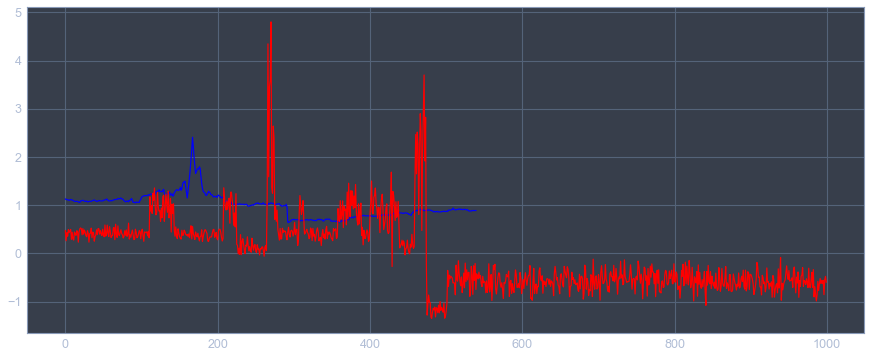

In [15]:
# 收集数据
data = ts.get_hist_data('502013',start='2009-12-31',end='2019-12-31')
close_v = data['close'].values
volume = data['volume'].values
dates = np.array([i for i in range(data.shape[0])])
fig1 = plt.figure(figsize=(16,5))
plt.plot(close_v)
plt.show()
# 数据预处理
diff = np.diff(close_v)#要训练的是收盘价格的变化值
dates = dates[1:]
close_v = close_v[1:]
volume = volume[1:]
X = np.c_[dates,diff,close_v,volume]
X = scale(X)
# 生成模型
hmm_model = GaussianHMM(n_components=8,n_iter=1000)
hmm_model.fit(X)
print('预测隐藏状态中-------------------------------------------')
hidden_states = hmm_model.predict(X)

print('--------------------------------涨幅预测图----------------------------------')
samples,_ = hmm_model.sample(num_sample)
fig2 = plt.figure(figsize=(15,6))
plt.plot(X[:num_sample],c='blue',label='Rise%')
plt.plot(samples[:,0],c='red',label='Predicted%')
plt.title('hmm for 1000 samples with 2 componets')
plt.legend()
plt.show()

print('—————————————————成交量预测图————————————————')
fig3 = plt.figure(figsize=(15,6))
plt.plot(volume[:num_sample],c='blue')
plt.plot(samples[:1],c='red',label='Predicted/%')
plt.legend()
plt.show()

fig4 = plt.figure(figsize=(15,6))
plt.plot(close_v[:num_sample],c='blue',label='Rise/%')
plt.plot(samples[:,2],c='red',label='Predicted/%')
plt.legend()
plt.show()

# 图像内容分析

In [1]:
from __future__ import print_function, division
import jupyterthemes.jtplot as jtplot
jtplot.style()
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from cv2 import *

In [ ]:
img_file = 'C:/Users/千乘/Pictures/Saved Pictures/电脑壁纸/girls/sexy/4.jpg'
img = cv2.imread(img_file)

sobel_horizontal = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) # 索贝尔水平检测器
sobel_vertical = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # 索贝尔竖直检测器
laplacian = cv2.Laplacian(img,cv2.CV_64F) # 拉普拉斯边检测器
canny = cv2.Canny(img,50,240) # Canny边检测器
'''# 写入文件
path = 'C:/Users/admin/Jupyter/Results/'
outputfile_1 = '1_sobel_h.jpg'
outputfile_2 = '1_sobel_v.jpg'
outputfile_3 = '1_laplacian.jpg'
outputfile_4 = '1_canny.jpg'
cv2.imwrite(path+outputfile_1,sobel_horizontal)
cv2.imwrite(path+outputfile_2,sobel_vertical)
cv2.imwrite(path+outputfile_3,laplacian)
cv2.imwrite(path+outputfile_4,canny)
'''

# star特征检测器
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
SFD = cv2.xfeatures2d.StarDetector_create()
keypoints = SFD.detect(img)
cv2.drawKeypoints(img,keypoints,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# sift 特征检测器
sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(img_gray)
cv2.drawKeypoints(img,keypoints,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# 展示图片
cv2.imshow('Original',img)
cv2.imshow('sobel_horizontal',sobel_horizontal)
cv2.imshow('sobel_vertical',sobel_vertical)
cv2.imshow('Laplacian',laplacian)
cv2.imshow('Canny',canny)
cv2.imshow('Star Features',img)
cv2.imshow('SIFT Fratures',img)
cv2.waitKey()